# AIMS CDT DATA, ESTIMATION AND INFERENCE LAB SHEET

## Question 1
Load the data, defining the tide height readings to be y and the reading times to be t.

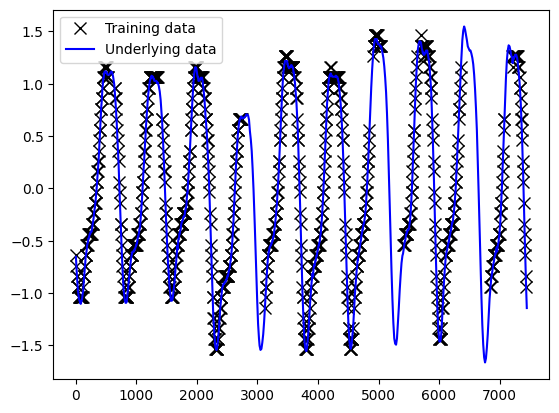

In [88]:
from load_data import get_data, plot_samples_and_underlying_data

X_train, y_train, X_test, _, X_underlying, y_underlying = get_data()
plot_samples_and_underlying_data(X_train, y_train, X_underlying, y_underlying)



## Question 2
Write your own Gaussian process code to perform retrospective prediction for the missing readings.
Hold covariance and mean function hyperparameters fixed to sensible values of your choice as a first step.

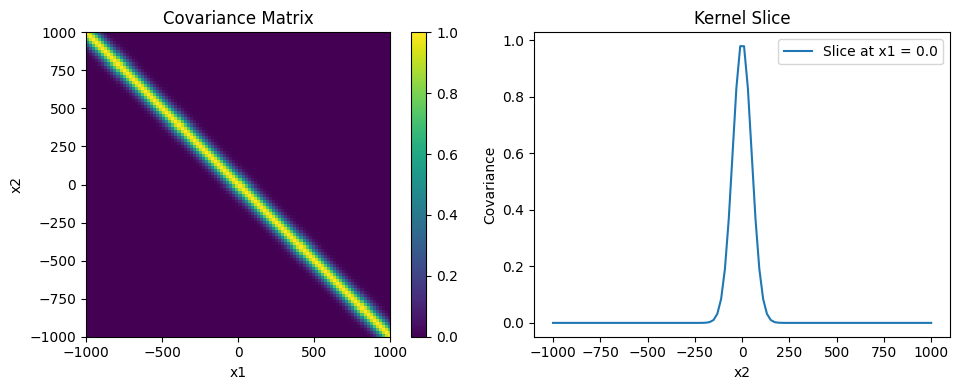

In [89]:
from main import GaussianProcess
from kernels import SquaredExponential

# Initialize the kernel and Gaussian Process
kernel = SquaredExponential(l=50.0, sigma_f=1.0)
kernel.plot()


101.64656


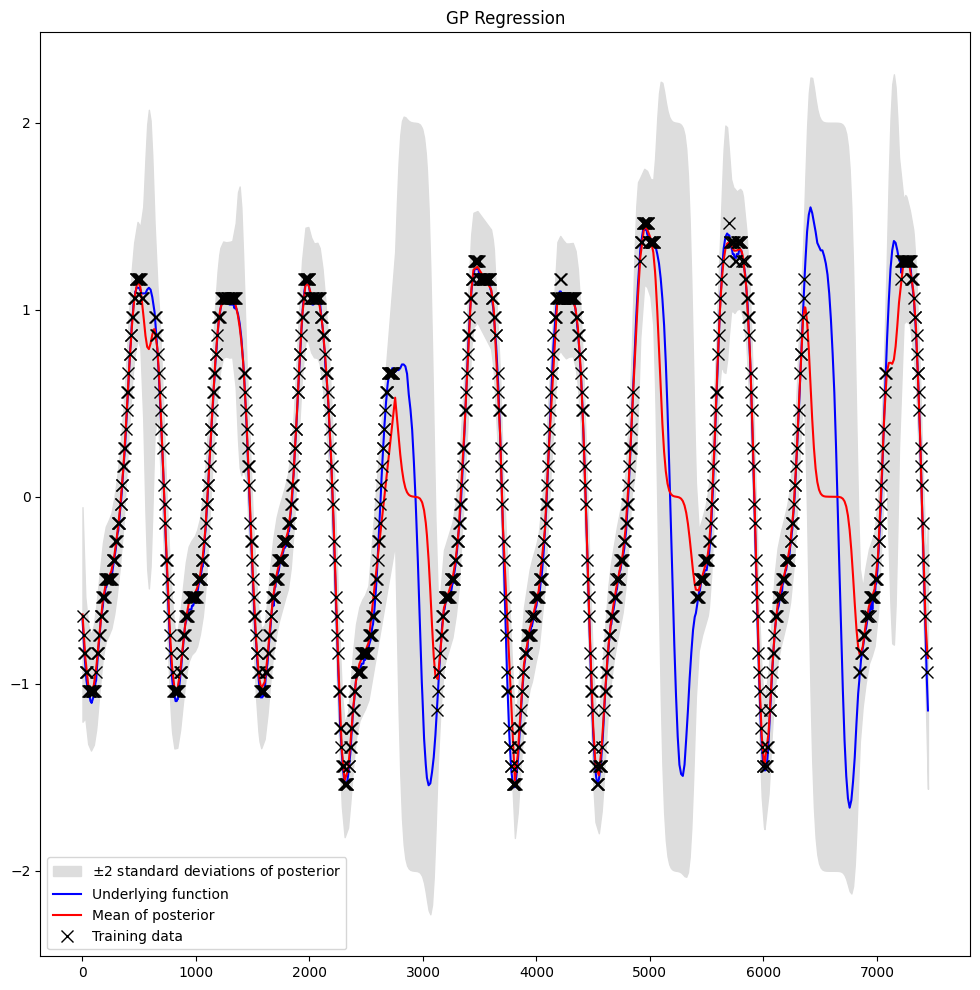

In [90]:
gp = GaussianProcess(kernel)

# Fit the GP to the training data
gp.fit(X_train, y_train)

# Predict the missing values
mean_pred, cov_pred = gp.predict(X_test)

# Plot the results using the covariance predictions as fill between
gp.plot_gp(X_train, y_train, X_test, X_underlying, y_underlying, mean_pred, cov_pred)

/home/j/Documents/AIMS/AIMS_gaussian_processes/main.py:93: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean_s.flatten(), cov_s, n_samples)


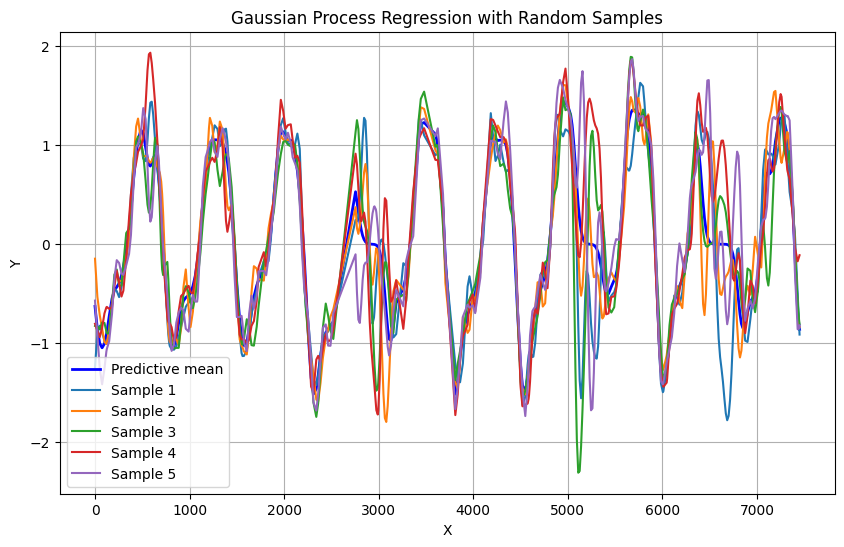

In [91]:
gp.plot_draws_from_gp(X_test, n_draws=10)

## Question 3
Compare against the ground truth tide heights using root-mean-square-error or the predictive loglikelihood, log p(test data|training data).

In [92]:
import torch
from eval import root_mean_squared_error

underlying_dataset = torch.tensor(list(zip(X_underlying, y_underlying)), dtype=torch.float32)
predictions_dataset = torch.tensor(list(zip(X_test, mean_pred)), dtype=torch.float32)

# Find the indices of the underlying dataset that are in the predictions dataset
indices = torch.tensor([i for i in range(underlying_dataset.shape[0]) if underlying_dataset[i, 0] in predictions_dataset[:, 0]])

# Remove any indices that are not in the predictions dataset
underlying_dataset = underlying_dataset[indices]

# Calculate the root mean squared error
rmse = root_mean_squared_error(underlying_dataset[:, 1], predictions_dataset[:, 1])
print(f"Root mean squared error: {rmse.item()}")

Root mean squared error: 0.4474777281284332


## Question 4
Test some more sophisticated covariance and mean functions to try to improve performance.

### Periodic

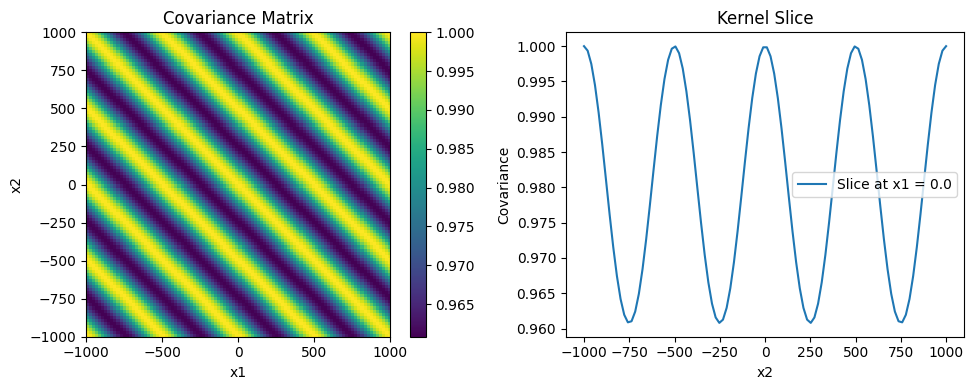

In [93]:
from kernels import Periodic, SquaredExponentialPlusPeriodic, SquaredExponentialTimesPeriodic

# Periodic
kernel = Periodic(omega=50.0, sigma_f=1.0, p=500.0)
kernel.plot()

4490.8613


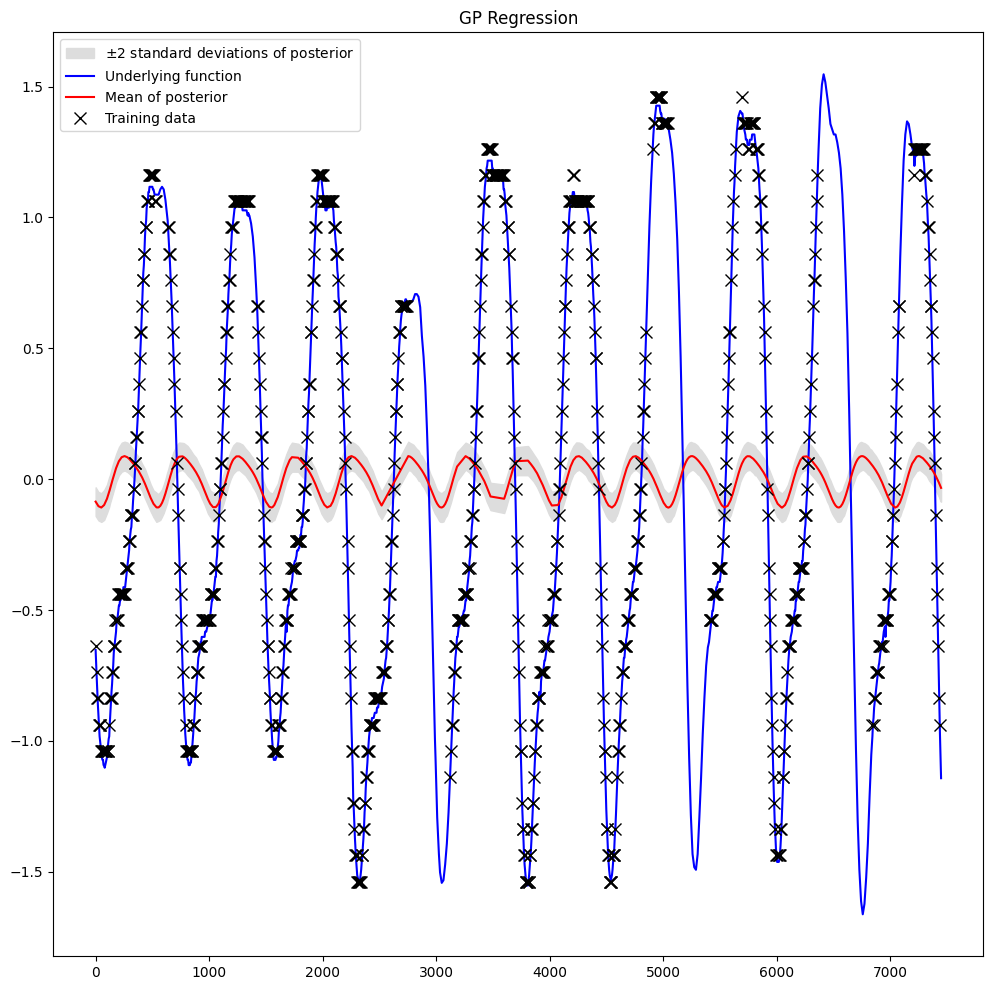

In [94]:
gp = GaussianProcess(kernel)

# Fit the GP to the training data
gp.fit(X_train, y_train)

# Predict the missing values
mean_pred, cov_pred = gp.predict(X_test)

# Plot the results using the covariance predictions as fill between
gp.plot_gp(X_train, y_train, X_test, X_underlying, y_underlying, mean_pred, cov_pred)

### Squared Exponential + Periodic

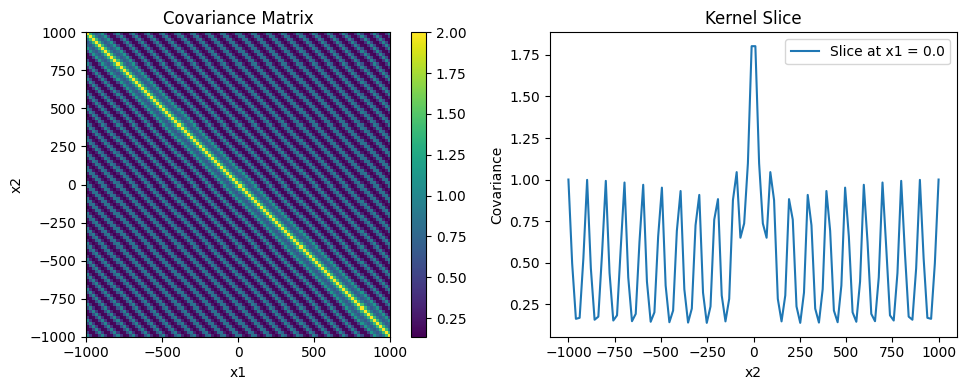

In [95]:

# Squared Exponential + Periodic
kernel = SquaredExponentialPlusPeriodic(l=50.0, sigma_f=1.0, p=100.0, omega=1.0)
kernel.plot()

2232.6558


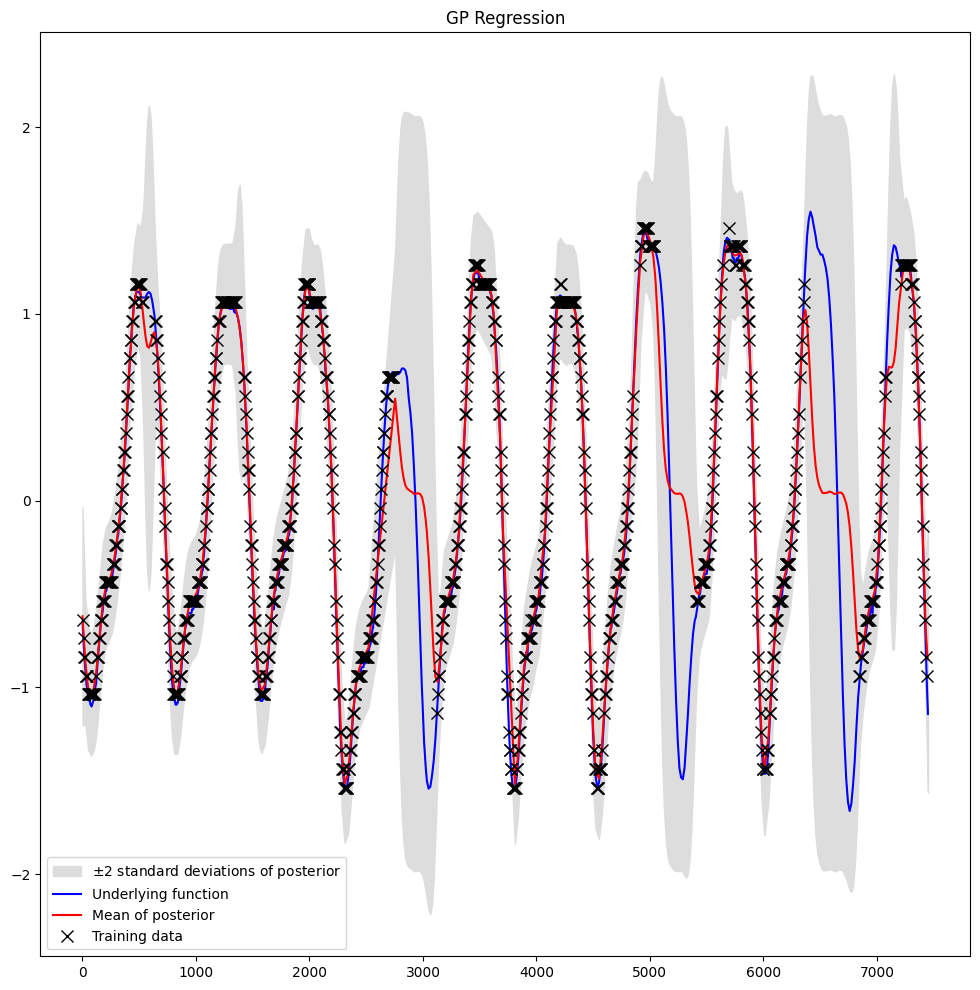

In [96]:
gp = GaussianProcess(kernel)

# Fit the GP to the training data
gp.fit(X_train, y_train)

# Predict the missing values
mean_pred, cov_pred = gp.predict(X_test)

# Plot the results using the covariance predictions as fill between
gp.plot_gp(X_train, y_train, X_test, X_underlying, y_underlying, mean_pred, cov_pred)

### Squared Exponential * Periodic

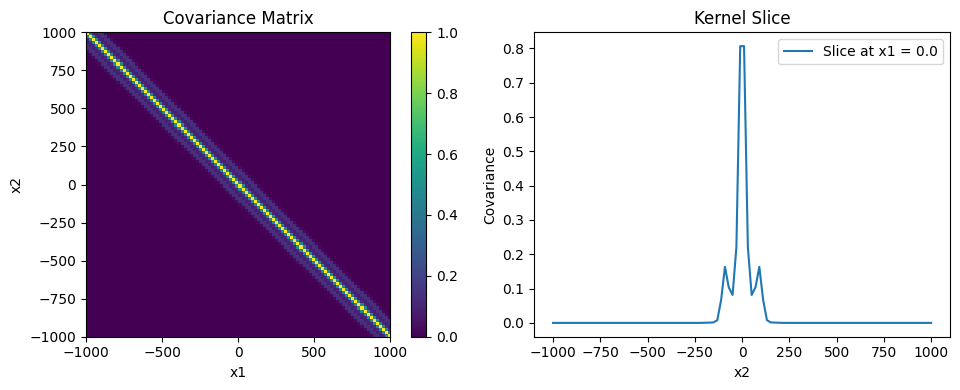

In [97]:
kernel = SquaredExponentialTimesPeriodic(l=50.0, sigma_f=1.0, p=100.0, omega=1.0)
kernel.plot()

48.401127


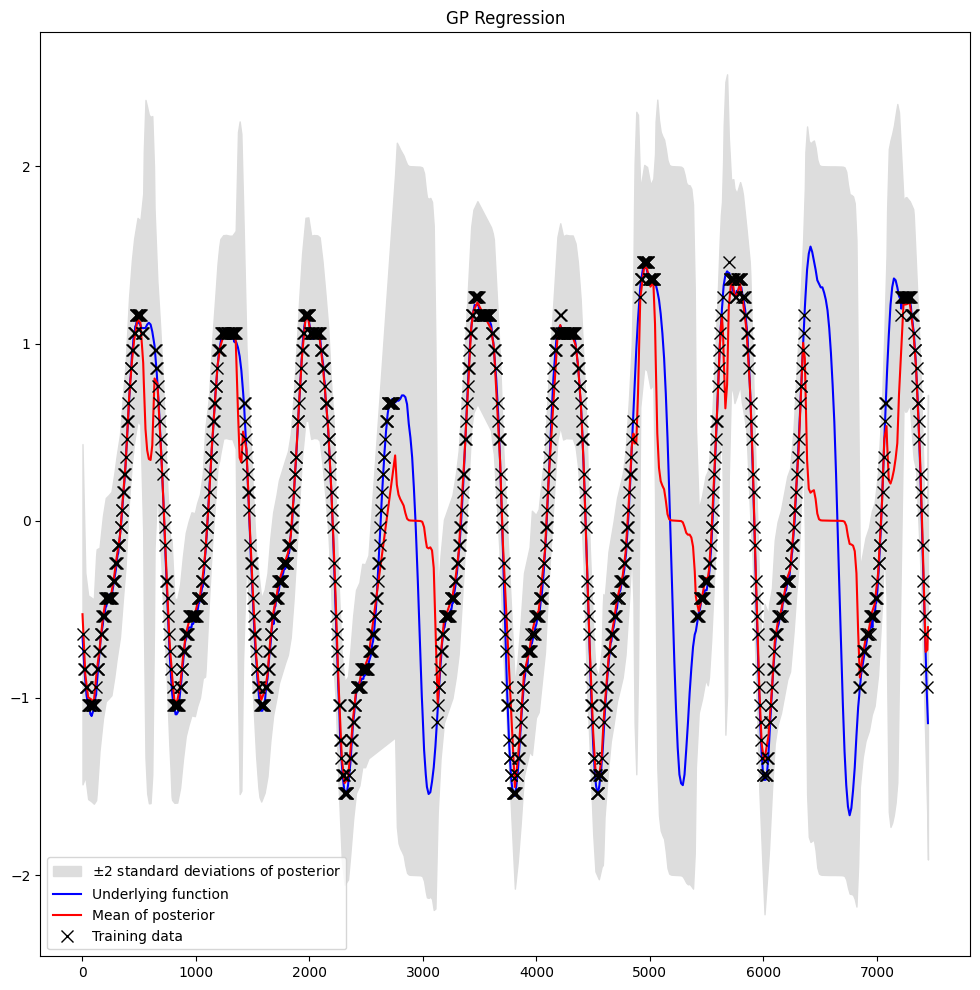

In [98]:
gp = GaussianProcess(kernel)

# Fit the GP to the training data
gp.fit(X_train, y_train)

# Predict the missing values
mean_pred, cov_pred = gp.predict(X_test)

# Plot the results using the covariance predictions as fill between
gp.plot_gp(X_train, y_train, X_test, X_underlying, y_underlying, mean_pred, cov_pred)

## Question 5
Investigate alternate means of managing the hyperparameters, including maximum likelihood and maximum a-posteriori.

87.51294


  0%|          | 2/1000 [00:00<02:43,  6.12it/s]

Iteration 1/1000 - Loss: 344.6137390136719


  1%|          | 11/1000 [00:01<03:03,  5.38it/s]

Iteration 11/1000 - Loss: 380.1888427734375


  2%|▏         | 21/1000 [00:03<03:11,  5.12it/s]

Iteration 21/1000 - Loss: 297.5972900390625


  3%|▎         | 31/1000 [00:16<29:33,  1.83s/it]

Iteration 31/1000 - Loss: 282.614990234375


  4%|▍         | 41/1000 [00:28<28:51,  1.81s/it]

Iteration 41/1000 - Loss: 278.02001953125


  5%|▌         | 51/1000 [00:36<05:59,  2.64it/s]

Iteration 51/1000 - Loss: 272.06414794921875


  6%|▌         | 61/1000 [00:38<04:05,  3.82it/s]

Iteration 61/1000 - Loss: 267.8936767578125


  7%|▋         | 71/1000 [00:41<03:55,  3.95it/s]

Iteration 71/1000 - Loss: 265.2537841796875


  8%|▊         | 81/1000 [00:43<04:01,  3.80it/s]

Iteration 81/1000 - Loss: 262.71954345703125


  9%|▉         | 91/1000 [00:46<04:03,  3.73it/s]

Iteration 91/1000 - Loss: 260.68115234375


 10%|█         | 101/1000 [00:49<03:57,  3.79it/s]

Iteration 101/1000 - Loss: 258.88922119140625


 11%|█         | 111/1000 [00:51<03:43,  3.97it/s]

Iteration 111/1000 - Loss: 257.35205078125


 12%|█▏        | 121/1000 [00:54<03:37,  4.03it/s]

Iteration 121/1000 - Loss: 256.0230712890625


 13%|█▎        | 131/1000 [00:56<03:38,  3.98it/s]

Iteration 131/1000 - Loss: 254.87713623046875


 14%|█▍        | 141/1000 [00:59<03:38,  3.93it/s]

Iteration 141/1000 - Loss: 253.892333984375


 15%|█▌        | 151/1000 [01:01<03:40,  3.85it/s]

Iteration 151/1000 - Loss: 253.0479736328125


 16%|█▌        | 161/1000 [01:04<03:42,  3.76it/s]

Iteration 161/1000 - Loss: 252.32672119140625


 17%|█▋        | 171/1000 [01:07<03:45,  3.67it/s]

Iteration 171/1000 - Loss: 251.712646484375


 18%|█▊        | 181/1000 [01:09<04:05,  3.33it/s]

Iteration 181/1000 - Loss: 251.191162109375


 19%|█▉        | 191/1000 [01:12<03:39,  3.69it/s]

Iteration 191/1000 - Loss: 250.7501220703125


 20%|██        | 201/1000 [01:15<03:52,  3.44it/s]

Iteration 201/1000 - Loss: 250.3785400390625


 21%|██        | 211/1000 [01:18<03:34,  3.68it/s]

Iteration 211/1000 - Loss: 250.0660400390625


 22%|██▏       | 221/1000 [01:20<03:38,  3.56it/s]

Iteration 221/1000 - Loss: 249.80450439453125


 23%|██▎       | 231/1000 [01:23<03:34,  3.59it/s]

Iteration 231/1000 - Loss: 249.58624267578125


 24%|██▍       | 241/1000 [01:26<03:25,  3.69it/s]

Iteration 241/1000 - Loss: 249.4046630859375


 25%|██▌       | 251/1000 [01:29<03:28,  3.60it/s]

Iteration 251/1000 - Loss: 249.253662109375


 26%|██▌       | 261/1000 [01:32<03:35,  3.43it/s]

Iteration 261/1000 - Loss: 249.1290283203125


 27%|██▋       | 271/1000 [01:35<03:25,  3.55it/s]

Iteration 271/1000 - Loss: 249.0262451171875


 28%|██▊       | 281/1000 [01:37<03:19,  3.60it/s]

Iteration 281/1000 - Loss: 248.9417724609375


 29%|██▉       | 291/1000 [01:40<03:21,  3.53it/s]

Iteration 291/1000 - Loss: 248.872314453125


 30%|███       | 301/1000 [01:43<03:19,  3.50it/s]

Iteration 301/1000 - Loss: 248.81573486328125


 31%|███       | 311/1000 [01:46<03:15,  3.53it/s]

Iteration 311/1000 - Loss: 248.76971435546875


 32%|███▏      | 321/1000 [01:49<03:20,  3.39it/s]

Iteration 321/1000 - Loss: 248.73236083984375


 33%|███▎      | 331/1000 [01:52<03:02,  3.66it/s]

Iteration 331/1000 - Loss: 248.7017822265625


 34%|███▍      | 341/1000 [01:55<03:15,  3.37it/s]

Iteration 341/1000 - Loss: 248.67742919921875


 35%|███▌      | 351/1000 [01:57<03:03,  3.53it/s]

Iteration 351/1000 - Loss: 248.657470703125


 36%|███▌      | 361/1000 [02:00<03:11,  3.33it/s]

Iteration 361/1000 - Loss: 248.6416015625


 37%|███▋      | 371/1000 [02:03<02:58,  3.52it/s]

Iteration 371/1000 - Loss: 248.62884521484375


 38%|███▊      | 381/1000 [02:06<02:56,  3.51it/s]

Iteration 381/1000 - Loss: 248.618408203125


 39%|███▉      | 391/1000 [02:09<02:56,  3.46it/s]

Iteration 391/1000 - Loss: 248.610107421875


 40%|████      | 401/1000 [02:12<02:54,  3.42it/s]

Iteration 401/1000 - Loss: 248.60345458984375


 41%|████      | 411/1000 [02:15<02:54,  3.37it/s]

Iteration 411/1000 - Loss: 248.59808349609375


 42%|████▏     | 421/1000 [02:18<02:40,  3.61it/s]

Iteration 421/1000 - Loss: 248.59375


 43%|████▎     | 431/1000 [02:21<02:43,  3.48it/s]

Iteration 431/1000 - Loss: 248.59033203125


 44%|████▍     | 441/1000 [02:24<02:42,  3.44it/s]

Iteration 441/1000 - Loss: 248.58746337890625


 45%|████▌     | 451/1000 [02:26<02:39,  3.45it/s]

Iteration 451/1000 - Loss: 248.5848388671875


 46%|████▌     | 461/1000 [02:29<02:40,  3.35it/s]

Iteration 461/1000 - Loss: 248.58294677734375


 47%|████▋     | 471/1000 [02:32<02:31,  3.48it/s]

Iteration 471/1000 - Loss: 248.58123779296875


 48%|████▊     | 481/1000 [02:35<02:31,  3.42it/s]

Iteration 481/1000 - Loss: 248.57977294921875


 49%|████▉     | 491/1000 [02:38<02:29,  3.40it/s]

Iteration 491/1000 - Loss: 248.57830810546875


 50%|█████     | 501/1000 [02:41<02:25,  3.42it/s]

Iteration 501/1000 - Loss: 248.5770263671875


 51%|█████     | 511/1000 [02:44<02:20,  3.48it/s]

Iteration 511/1000 - Loss: 248.575927734375


 52%|█████▏    | 521/1000 [02:47<02:20,  3.41it/s]

Iteration 521/1000 - Loss: 248.57501220703125


 53%|█████▎    | 531/1000 [02:50<02:17,  3.40it/s]

Iteration 531/1000 - Loss: 248.57403564453125


 54%|█████▍    | 541/1000 [02:53<02:20,  3.28it/s]

Iteration 541/1000 - Loss: 248.572998046875


 55%|█████▌    | 551/1000 [02:56<02:15,  3.31it/s]

Iteration 551/1000 - Loss: 248.57208251953125


 56%|█████▌    | 561/1000 [02:59<02:13,  3.28it/s]

Iteration 561/1000 - Loss: 248.5712890625


 57%|█████▋    | 571/1000 [03:02<02:08,  3.33it/s]

Iteration 571/1000 - Loss: 248.57049560546875


 58%|█████▊    | 581/1000 [03:05<02:02,  3.42it/s]

Iteration 581/1000 - Loss: 248.569580078125


 59%|█████▉    | 591/1000 [03:08<02:04,  3.30it/s]

Iteration 591/1000 - Loss: 248.56866455078125


 60%|██████    | 601/1000 [03:11<02:01,  3.28it/s]

Iteration 601/1000 - Loss: 248.56787109375


 61%|██████    | 611/1000 [03:14<01:53,  3.43it/s]

Iteration 611/1000 - Loss: 248.56707763671875


 62%|██████▏   | 621/1000 [03:17<01:50,  3.42it/s]

Iteration 621/1000 - Loss: 248.566162109375


 63%|██████▎   | 631/1000 [03:20<01:52,  3.29it/s]

Iteration 631/1000 - Loss: 248.5654296875


 64%|██████▍   | 641/1000 [03:23<01:49,  3.27it/s]

Iteration 641/1000 - Loss: 248.564453125


 65%|██████▌   | 651/1000 [03:26<01:44,  3.34it/s]

Iteration 651/1000 - Loss: 248.563720703125


 66%|██████▌   | 661/1000 [03:29<01:41,  3.33it/s]

Iteration 661/1000 - Loss: 248.56280517578125


 67%|██████▋   | 671/1000 [03:32<01:34,  3.48it/s]

Iteration 671/1000 - Loss: 248.5621337890625


 68%|██████▊   | 681/1000 [03:35<01:37,  3.28it/s]

Iteration 681/1000 - Loss: 248.56121826171875


 69%|██████▉   | 691/1000 [03:38<01:27,  3.52it/s]

Iteration 691/1000 - Loss: 248.56036376953125


 70%|███████   | 701/1000 [03:41<01:25,  3.52it/s]

Iteration 701/1000 - Loss: 248.55963134765625


 71%|███████   | 711/1000 [03:44<01:24,  3.44it/s]

Iteration 711/1000 - Loss: 248.5589599609375


 72%|███████▏  | 721/1000 [03:46<01:20,  3.48it/s]

Iteration 721/1000 - Loss: 248.55804443359375


 73%|███████▎  | 731/1000 [03:49<01:14,  3.61it/s]

Iteration 731/1000 - Loss: 248.55731201171875


 74%|███████▍  | 741/1000 [03:52<01:20,  3.21it/s]

Iteration 741/1000 - Loss: 248.55645751953125


 75%|███████▌  | 751/1000 [03:55<01:13,  3.40it/s]

Iteration 751/1000 - Loss: 248.55560302734375


 76%|███████▌  | 761/1000 [03:58<01:08,  3.47it/s]

Iteration 761/1000 - Loss: 248.55462646484375


 77%|███████▋  | 771/1000 [04:01<01:05,  3.51it/s]

Iteration 771/1000 - Loss: 248.5538330078125


 78%|███████▊  | 781/1000 [04:04<01:02,  3.52it/s]

Iteration 781/1000 - Loss: 248.55291748046875


 79%|███████▉  | 791/1000 [04:07<01:01,  3.40it/s]

Iteration 791/1000 - Loss: 248.55224609375


 80%|████████  | 801/1000 [04:10<01:00,  3.31it/s]

Iteration 801/1000 - Loss: 248.5513916015625


 81%|████████  | 811/1000 [04:13<00:58,  3.22it/s]

Iteration 811/1000 - Loss: 248.55072021484375


 82%|████████▏ | 821/1000 [04:16<00:53,  3.34it/s]

Iteration 821/1000 - Loss: 248.5498046875


 83%|████████▎ | 831/1000 [04:19<00:51,  3.28it/s]

Iteration 831/1000 - Loss: 248.54888916015625


 84%|████████▍ | 841/1000 [04:22<00:48,  3.29it/s]

Iteration 841/1000 - Loss: 248.54815673828125


 85%|████████▌ | 851/1000 [04:25<00:43,  3.40it/s]

Iteration 851/1000 - Loss: 248.54730224609375


 86%|████████▌ | 861/1000 [04:28<00:41,  3.36it/s]

Iteration 861/1000 - Loss: 248.54656982421875


 87%|████████▋ | 871/1000 [04:31<00:37,  3.43it/s]

Iteration 871/1000 - Loss: 248.5458984375


 88%|████████▊ | 881/1000 [04:34<00:34,  3.46it/s]

Iteration 881/1000 - Loss: 248.5450439453125


 89%|████████▉ | 891/1000 [04:37<00:32,  3.39it/s]

Iteration 891/1000 - Loss: 248.5443115234375


 90%|█████████ | 901/1000 [04:39<00:29,  3.40it/s]

Iteration 901/1000 - Loss: 248.5433349609375


 91%|█████████ | 911/1000 [04:43<00:29,  2.98it/s]

Iteration 911/1000 - Loss: 248.54278564453125


 92%|█████████▏| 921/1000 [04:46<00:23,  3.43it/s]

Iteration 921/1000 - Loss: 248.541748046875


 93%|█████████▎| 931/1000 [04:48<00:19,  3.51it/s]

Iteration 931/1000 - Loss: 248.541015625


 94%|█████████▍| 941/1000 [04:51<00:16,  3.53it/s]

Iteration 941/1000 - Loss: 248.54034423828125


 95%|█████████▌| 951/1000 [04:54<00:14,  3.46it/s]

Iteration 951/1000 - Loss: 248.53948974609375


 96%|█████████▌| 961/1000 [04:57<00:11,  3.39it/s]

Iteration 961/1000 - Loss: 248.538818359375


 97%|█████████▋| 971/1000 [05:00<00:08,  3.25it/s]

Iteration 971/1000 - Loss: 248.53778076171875


 98%|█████████▊| 981/1000 [05:03<00:05,  3.44it/s]

Iteration 981/1000 - Loss: 248.5372314453125


 99%|█████████▉| 991/1000 [05:06<00:02,  3.35it/s]

Iteration 991/1000 - Loss: 248.5362548828125


100%|██████████| 1000/1000 [05:09<00:00,  3.23it/s]


Final loss: 248.53558349609375
("Final parameters: {'squared_exponential.l': 113.64929962158203, "
 "'squared_exponential.sigma_f': 0.9323793649673462, 'periodic.omega': "
 "20.58610725402832, 'periodic.sigma_f': 0.9323768615722656, 'periodic.p': "
 '619.84521484375}')


/home/j/Documents/AIMS/AIMS_gaussian_processes/main.py:111: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(cov_pred.detach().numpy()))


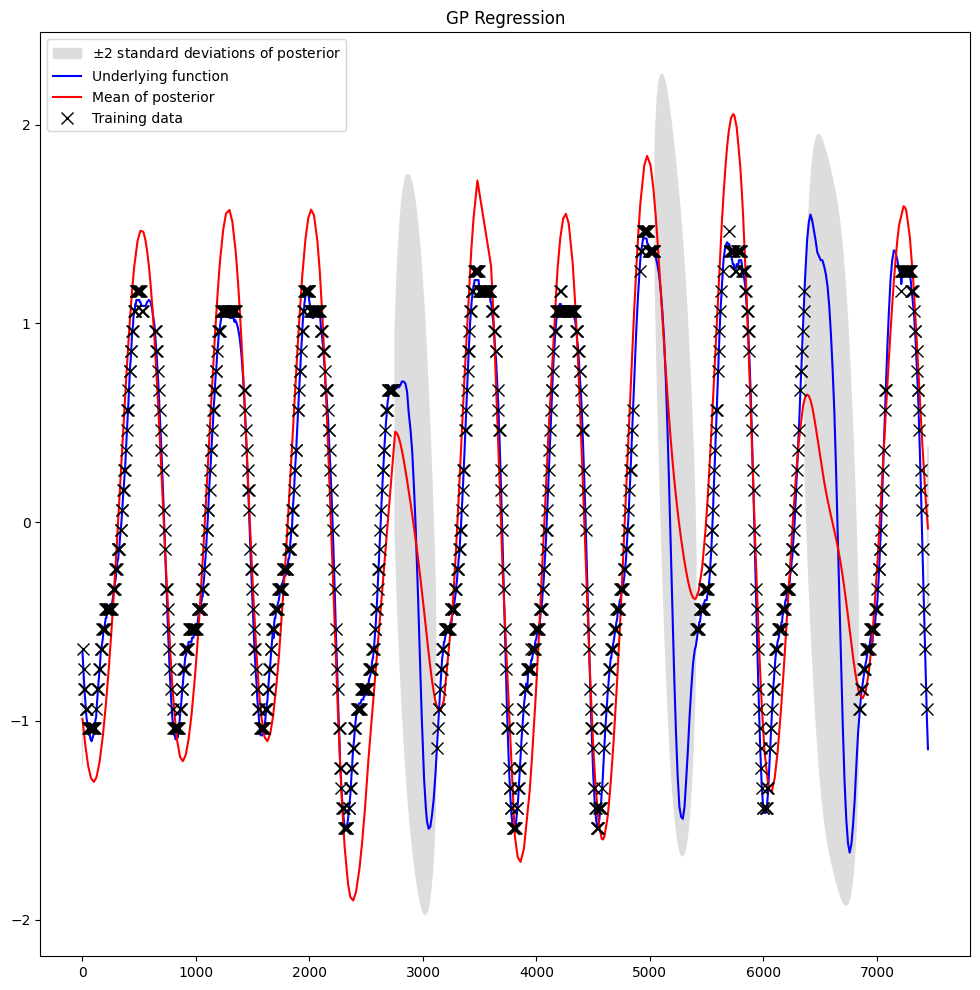

In [99]:

X_train, y_train, X_test, _, X_underlying, y_underlying = get_data()

# Initialize the kernel and Gaussian Process
# kernel = SquaredExponential(l=50.0, sigma_f=1.0)
# # kernel = SquaredExponentialPlusPeriodic(l=50.0, sigma_f=1.0, p=100.0, omega=1.0)
# kernel = Periodic(omega=1.0, sigma_f=1.0, p=500.0)
kernel = SquaredExponentialTimesPeriodic(l=50.0, sigma_f=1.0, p=500.0, omega=1.0)

gp = GaussianProcess(kernel)

# Fit the GP to the training data
gp.fit(X_train, y_train)

# Optimize hyperparameters
gp.optimize_hyperparameters(learning_rate=0.5, n_iters=1000)

# Predict the missing values
mean_pred, cov_pred = gp.predict(X_test)

# Plot the results using the covariance predictions as fill between
gp.plot_gp(X_train, y_train, X_test, X_underlying, y_underlying, mean_pred, cov_pred)


In [100]:

underlying_dataset = torch.tensor(list(zip(X_underlying, y_underlying)), dtype=torch.float32)
predictions_dataset = torch.tensor(list(zip(X_test, mean_pred)), dtype=torch.float32)

# Find the indices of the underlying dataset that are in the predictions dataset
indices = torch.tensor([i for i in range(underlying_dataset.shape[0]) if underlying_dataset[i, 0] in predictions_dataset[:, 0]])

# Remove any indices that are not in the predictions dataset
underlying_dataset = underlying_dataset[indices]

# Calculate the root mean squared error
rmse = root_mean_squared_error(underlying_dataset[:, 1], predictions_dataset[:, 1])
print(f"Root mean squared error: {rmse.item()}")

Root mean squared error: 0.4733210802078247
